# 6-Laboratory-12-11-2020
 

> Credits to the authors of the exercises: Andrea Pasini, Giuseppe Attanasio, Flavio Giobergia <br />
Master of Science in Data Science and Engineering, Politecnico di Torino, A.A. 2020-21

## Wine classification
In this exercise, you will use sklearn’s DecisionTreeClassifierto build a decision tree for the winedataset.

-  (1) Load the wine dataset from sklearn. Then, based on your X and y, answer the following questions:
  - How many records are available?
  - Are there missing values?
  - How many elements does each class contain?

In [ ]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset["data"]
y = dataset["target"]

feature_names = dataset["feature_names"]

In [ ]:
import numpy as np
from collections import Counter

print("Recorda available\t",len(X))
print("X null values\t\t", np.isnan(X).sum())
print("y null values\t\t",np.isnan(y).sum())
print("y classes\t\t",dict(Counter(y)))

Recorda available	 178
X null values		 0
y null values		 0
y classes		 {0: 59, 1: 71, 2: 48}


-  (2) Create a DecisionTreeClassifier object with the default configuration (i.e. without passing anyparameters to the constructor). Train the classifier using your X and y.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

-  (3) Now that you have created a tree, you can visualize it.

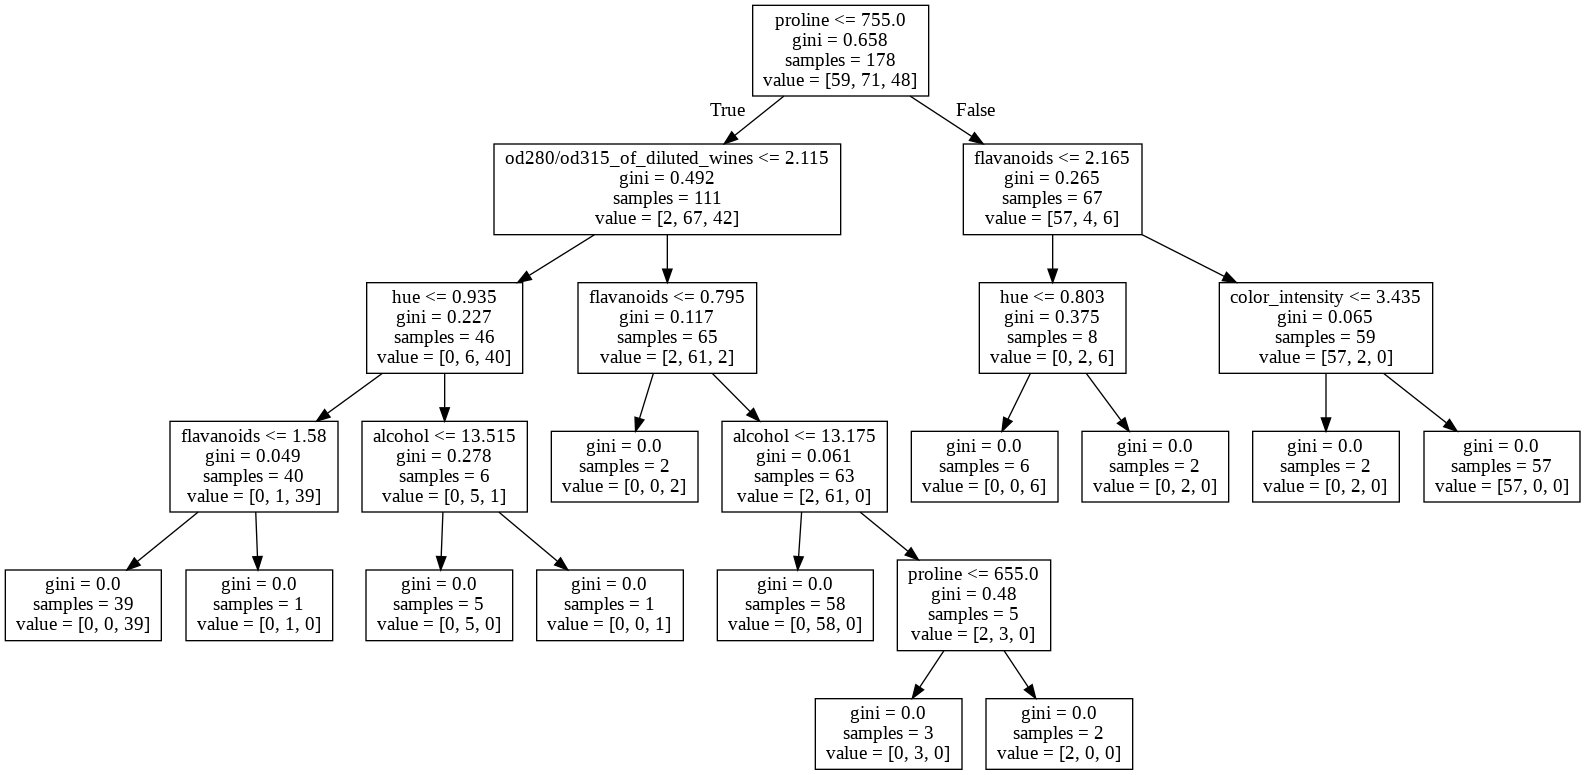

In [ ]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_code = export_graphviz(clf, feature_names=dataset["feature_names"])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

-  (4) Given the dataset X, you can get the predictions of the classifier (one for each entry in X). Then, use the accuracy_score() function to compute the accuracy between two lists of values. You can already compute the accuracy of your classifier. What result do you get? Does this result seem particularly high/low? Why do you think that is?

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)
print(acc)

1.0


Well, as I expected, the accuracy is quite high (100%), but of course the reason is that we tested the classifier with the same data used for training it. So, the decision tree is based on the same data that we have used for the test.
<br /><br />
-  (5) Now, we can split our dataset into a training set and a test set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y)

-  (6) Now, train a new model using (X_train, y_train). Then, compute the accuracy with (X_test,y_test). How does this value compare to the previously computed one? Is this a more reasonablevalue? Why? You can also compute other metrics (e.g. precision, recall,F1score) using the respective functions

In [ ]:
# I'll use the previous one

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.8888888888888888


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

p, r, f, s = precision_recall_fscore_support(y_test,y_pred)

p, r, f

(array([0.92307692, 0.91666667, 0.81818182]),
 array([1.        , 0.78571429, 0.9       ]),
 array([0.96      , 0.84615385, 0.85714286]))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.92      0.79      0.85        14
           2       0.82      0.90      0.86        10

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.89      0.89      0.89        36



-  (7) In this exercise, you will perform a “grid search”: you will define a set of possible config-urations and, for each configuration, build a classifier. Then, you will test the performance of each classifier and identify that configuration that produces the best model.
<br /><br />
For example, we can identify these two parameters:
  - max_depth, which defines the maximum depth of the decision tree, can be set toNone(i.e.unbounded depth), or to values such as 2, 4, 8 (we already know from previous exercises theapproximate depth the tree can reach with this dataset)  
  - splitter, which can be set to either best(in which case, for each split, the algorithm will tryall possible splits), or random(in this case, the algorithm will try N random splits on various features and select the best one)

In [ ]:
from sklearn.model_selection import ParameterGrid

# hyperparams
params = {
    "max_depth" : [None, 2, 4, 8],
    "splitter" : ["best","random"]
}

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y)

for config in ParameterGrid(params):
  print(">>>",config)
  clf = DecisionTreeClassifier(**config)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))

>>> {'max_depth': None, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.92      0.86      0.89        14
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

>>> {'max_depth': None, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.92      0.79      0.85        14
           2       0.91      1.00      0.95        10

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.89        36
weighted avg       0.89      0.89      0.89        36

>>> {'max_depth': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        1

it seems that the best configuration is {'max_depth': 4, 'splitter': 'random'}

-  (8) Since we used our test data to select the model, you may be overfitting on the test data (you may have selected the configuration that works best for the test set, but which may not be as good on new data). Typically, you do not want to use the test set for tuning the model’s hyperparameters, since the test set should only be used as a final evaluation. For this reason, datasets are typically splitted into : Training set, Validation set, Test set. <br /><br />
However, it often happens that only a limited amount of data is available. In these cases, it is wasteful to only use a small fraction of the dataset for the actual training. In these cases, cross-validationcanbe used to “get rid” of the validation set.

In [ ]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
#   be seen by the classifier during the training/validation phases)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,  y, test_size=0.2,stratify=y)
kf = KFold(5)

# hyperparams
params = {
    "max_depth" : [None, 2, 4, 8],
    "splitter" : ["best","random"],
    "min_impurity_decrease": [0, .01, .03, .07, .09, .11]
}

mean_acc = []
for config in ParameterGrid(params):
  # accuracy list
  k_acc = []
  # 5-fold cross-validation# X and y are the arrays to be split
  for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]
    
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_valid)
    
    k_acc.append(accuracy_score(y_valid, y_pred))
  
  mean_acc.append( sum(k_acc)/len(k_acc) )

max(mean_acc)

0.9504926108374384

In [ ]:
# the best configuration should be for {'max_depth': 4, 'splitter': 'random'}
clf = DecisionTreeClassifier(max_depth=4, splitter='random')

# copied by the proposal solution - I did it with a way more complex structure
best_config = list(ParameterGrid(params))[np.argmax(mean_acc)]

clf = DecisionTreeClassifier(**best_config)
clf.fit(X_train_valid,y_train_valid)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8611111111111112


-  (9)* Given a decision tree, we can assign an importance to each split of the tree. The importance of a split can be computed as the decrease in impurity achieved by it. The following are some definitions we will use to define the impurity decrease of a node P:
  - iP is the impurity (e.g. GINI index) of the node (parent)
  - iL and iR are respectively the impurities of the left and right children ofP
  - |P| is the cardinality of the parent node (i.e. the number of elements contained)
  - |L| and |R| are the cardinalities of the left and right children
  - N is the total number of observations in the dataset 
  
  A possible way of computing the impurity decrease I(P) of P is the following: <br />
  <center>$I(P) = \frac {|P|} N i_P - \frac {|L|} N i_L - \frac {|R|} N i_R$</center>

  In this exercise you will build a function that, given a tree, extracts all the feature importances. To do this, you should have some prior knowledge of how binary trees work and, in particular,how a pre-order tree traversal works. This is because the DecisionTreeClassifierclass has an attribute, clf.tree_, which contains both the features used at each split (clf.tree_.feature)and the impurity for each split (clf.tree_.impurity). These are arrays of the pre-order traversal of the tree. From these, you should build the feature importance for each split.

## Synthetic dataset

1. Load the synthetic dataset. This dataset has two features and a class label. Use matplotlib’s scatter() function to plot the dataset on a 2D plane and color the points based on their class label. How do you expect a decision tree to approach data distributed inthis way?

In [14]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv')
df.sample(5)

x0        x1  label
431  9.211773  6.351714      0
442  5.077950  5.090038      0
348  5.359008  2.408898      1
108  2.878752  5.470515      1
351  1.880961  9.537894      0

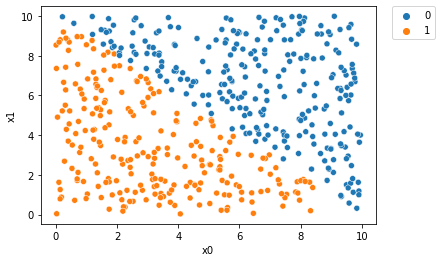

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x="x0", y="x1", hue="label")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Well, the're well seperated, but the problem is that a decision tree uses "perpendicolar" sections, as you can see <a href="https://lh3.googleusercontent.com/proxy/UaLiZJlY80y25egE1oUVNIF31g9fj1jVOd8cysZ_xnv6NmqMYNyf5EEZV8zffBSJNcCX4tnSMMa6aTCtXdCuAGVSm8hdFGrPLSM4HzxF8Dn_EvJ--tM2cXPx8Bj8qK3X"> here </a>.

So, for a better accurcy we'll need several splits on this plane. 
<br />

2. Build a “default” decision tree using the entire dataset, then visualize the learned model. What is the tree learning, and why

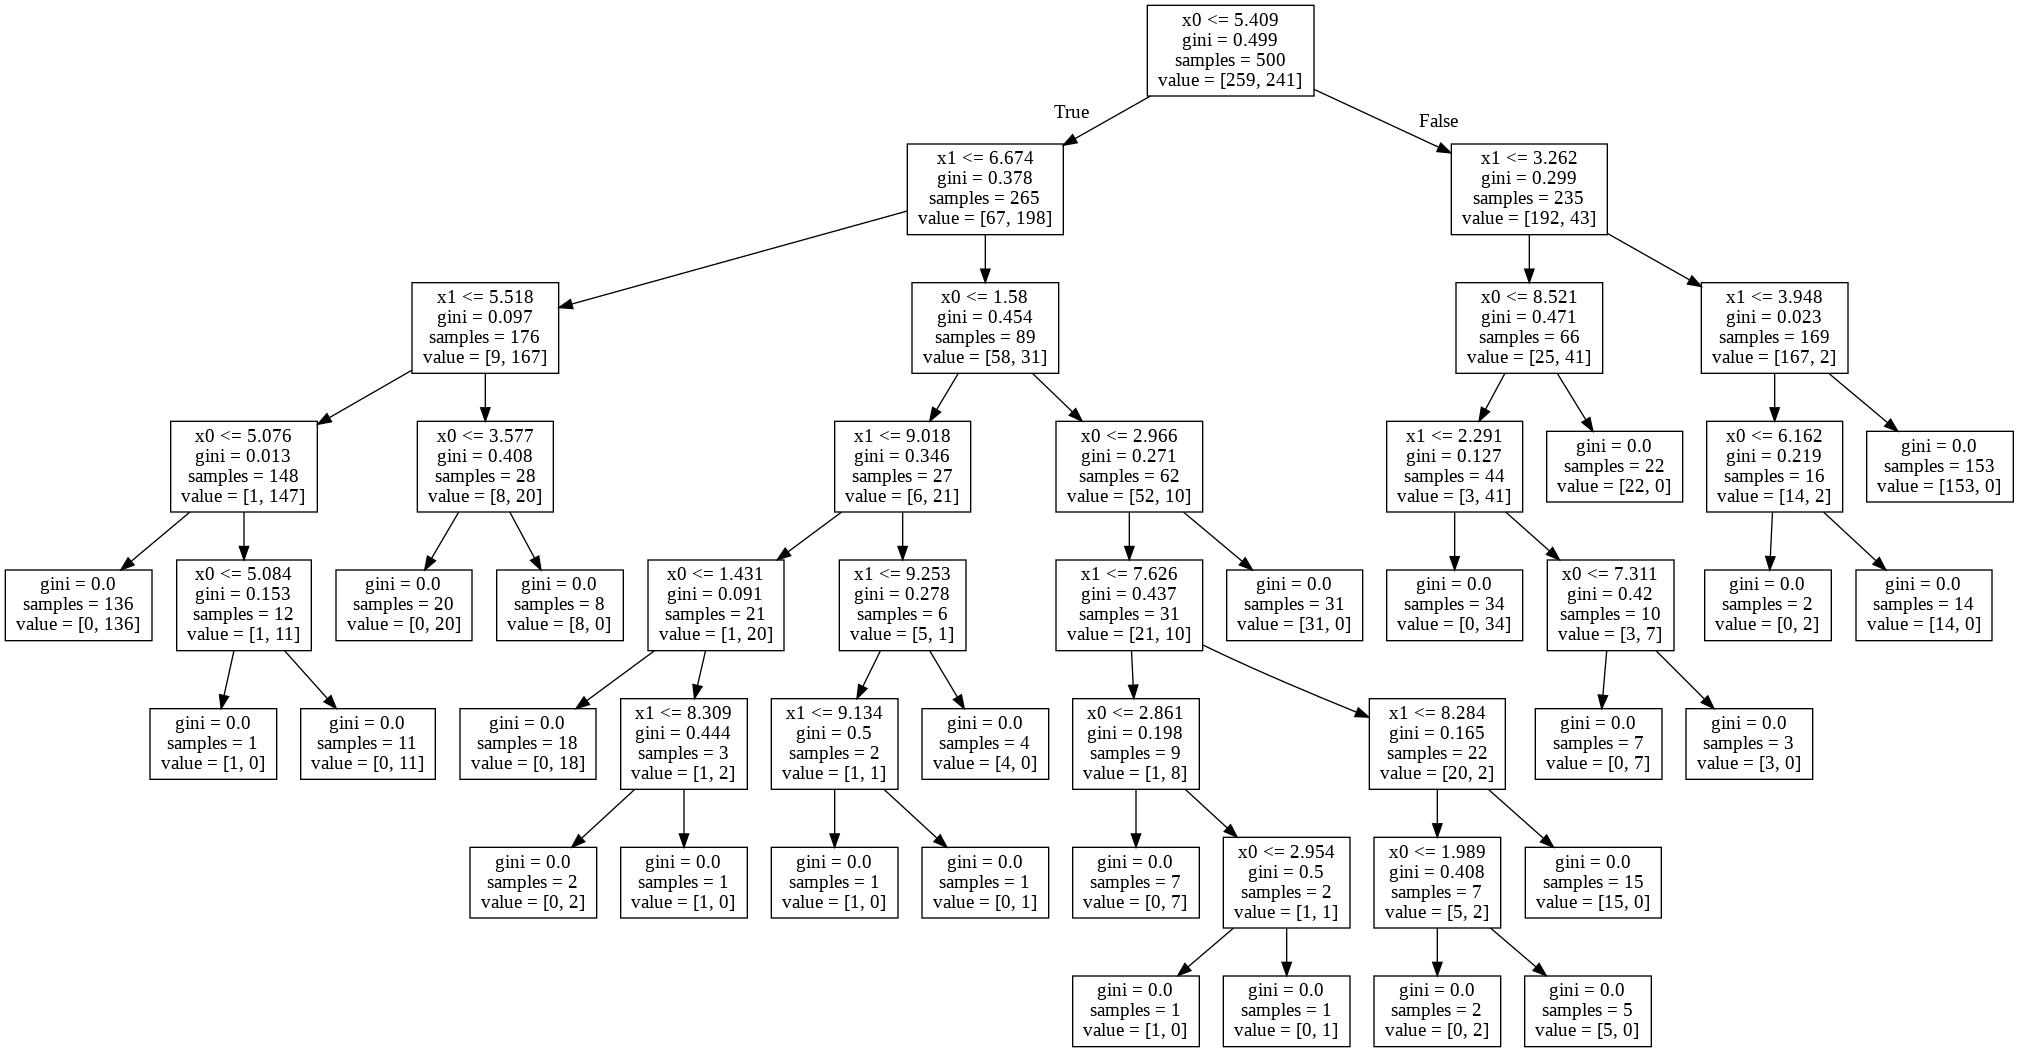

In [22]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier


clf_def = DecisionTreeClassifier()
clf_def.fit(df[["x0","x1"]],df["label"])

dot_code = export_graphviz(clf_def,feature_names=["x0", "x1"])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

So, there isn't a well defined separation as we dreamed, but it tries to approximate every set of solutions. 

3. (*) Identify a preprocessing step that would make the decision tree “correctly” approach this problem

As we studied in class, a DecisionTreeClassifier works better with less parameters, so o possible solution could consist on a data transformation. So, we can use the sum of the two parameters. Of course it won't be as precise as the original one, but a side effect would be the readbility and the simplicity of the tree

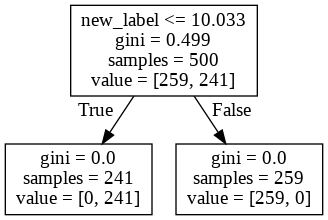

In [21]:
import pydot
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

df_transformed = pd.DataFrame(df["x0"] + df["x1"])

clf_def_new = DecisionTreeClassifier()
clf_def_new.fit(df_transformed,df["label"])

dot_code = export_graphviz(clf_def_new,feature_names=["new_label"])
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

4. (*) sklearn’s decision trees store, for each split they do, the information about the feature they are using for the split and the threshold value used in the comparison. You can find this information in clf.tree\_.feature and clf.tree\_.threshold (the order of the elements in those arrays is theone you get with a pre-order visit of the decision tree). With this information, plot the decision boundaries (i.e. features’ thresholds) applied by the decision tree on the dataset. Ideally, you should have a 2D scatter plot with vertical and horizontal lines that divide the plane into subregions (one foreach leaf of the tree). You can use matplotlib’s axvline and axhline to plot vertical and horizontallines in your plot.

In [24]:
# my DecisionTree is clf_def
clf_def.tree_.feature

array([ 0,  1,  1,  0, -2,  0, -2, -2,  0, -2, -2,  0,  1,  0, -2,  1, -2,
       -2,  1,  1, -2, -2, -2,  0,  1,  0, -2,  0, -2, -2,  1,  0, -2, -2,
       -2, -2,  1,  0,  1, -2,  0, -2, -2, -2,  1,  0, -2, -2, -2])

0 and 1 are the classes (x0 and x1) whereas -2 means that it is a leaf node

In [26]:
clf_def.tree_.threshold

array([ 5.40876412,  6.6744628 ,  5.51829243,  5.07607341, -2.        ,
        5.08434319, -2.        , -2.        ,  3.57739341, -2.        ,
       -2.        ,  1.57965869,  9.01819515,  1.4306519 , -2.        ,
        8.30936813, -2.        , -2.        ,  9.253016  ,  9.13419342,
       -2.        , -2.        , -2.        ,  2.96561909,  7.62585855,
        2.86126113, -2.        ,  2.95399797, -2.        , -2.        ,
        8.28434324,  1.98910064, -2.        , -2.        , -2.        ,
       -2.        ,  3.26193082,  8.52058029,  2.29148185, -2.        ,
        7.31053472, -2.        , -2.        , -2.        ,  3.94774652,
        6.16223955, -2.        , -2.        , -2.        ])

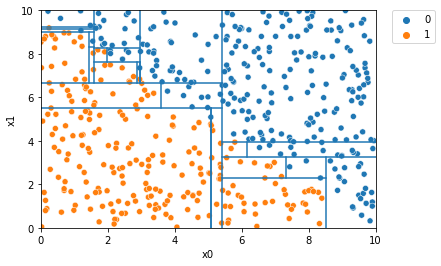

In [33]:
# updated from the proposal solution
def draw_split(features, thresholds, i, x0_min, x0_max, x1_min, x1_max):
  f, t = features[i], thresholds[i]
  if f == -2:
    # leaf node, return offset to be added
    # for the parent to visit the next child
    return 1
  
  # draw the current split
  if f == 0: # vertical split (x0)
    plt.axvline(t, x1_min*.1, x1_max*.1)
    # prepare the new bounding boxes
    # from x0_min to threshold
    bb_left = (x0_min, t, x1_min, x1_max)
    # from threshold to x0_max
    bb_right = (t, x0_max, x1_min, x1_max)
  
  else: # horizontal split (x1)
    plt.axhline(t, x0_min*.1, x0_max*.1)
    bb_left = (x0_min, x0_max, x1_min, t)
    bb_right = (x0_min, x0_max, t, x1_max)
  
  off_left = draw_split(features, thresholds, i+1, *bb_left)
  off_right = draw_split(features, thresholds, i+off_left+1, *bb_right)
  return off_right + off_left + 1
  
sns.scatterplot(data=df, x="x0", y="x1", hue="label")
plt.xlim(0,10)
plt.ylim(0,10)
draw_split(clf_def.tree_.feature, clf_def.tree_.threshold, 0, 0, 10, 0, 10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Random Forest
In this exercise, you will implement your own version of a random forest, using the trees available from scikit-learn. You will then train the random forest using the MNIST dataset and assess its performance compared to decision trees.

- (1) Load the MNIST dataset into memory. Divide the 70,000 digits you have into a training set (60,000digits) and a test set (10,000 digits).

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.14285)
len(X_train), len(X_test)

(60000, 10000)

- (2) Train a single decision tree (with the default parameters) on the training set, then compute its accuracy on the test set.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:\t",accuracy_score(y_test,y_pred))

Accuracy:	 0.8775


It is not fantastic but is quite acceptable

- (3) For this next exercise, you will implement your own version of a random forest. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import mode
import random
import math

class MyRandomForestClassifier ():
  def __init__(self, n_estimators = 100, max_features = -1):
    # -1 is a sentinel value : if it is not specified, I'll take the sqrt(features)
    
    self.max_features = max_features
    self.n_estimators = n_estimators
    
    # array of decision trees
    if self.max_features == -1:
      self.max_features = 'sqrt'
    
    self.clf_rf = [DecisionTreeClassifier(max_features=self.max_features) for i in range(self.n_estimators)]
    

  def fit(self, X, y):
    
    # fit every Decision Tree
    for tree in self.clf_rf:

      # random indexes without replacement (63% of the subset)
      indexes = random.sample(range(len(X_train)), int(len(X_train)*0.63))

      tree.fit(X[indexes], y[indexes])
  
  # predict the label for each point in X
  def predict(self, X):
    predictions = [ tree.predict(X) for tree in self.clf_rf ]
    return mode(predictions, axis=0)[0][0]

- (4) Now train your random forest with the 60,000 points of the training set and compute its accuracyagainst the test set. How does the random forest behave? How does it compare to a decision tree? How does this performance vary as the number of estimators grow? Try values from 10 to 100 (with steps of 10) for n_estimators

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.14285)

random_forest = MyRandomForestClassifier(10)
random_forest.fit(X_train,y_train)
Y = random_forest.predict(X_test)

accuracy_score(y_test,Y)

0.951

In [ ]:
# Much better!! Let's try with different values of n_estimators

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.14285)

# 10, 20, ... , 100
estimators = np.linspace(10,100,10).astype('int')
accuracies = []

for est in estimators:
  random_forest = MyRandomForestClassifier(est)
  random_forest.fit(X_train,y_train)
  y_pred = random_forest.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  print(est,acc,sep="\t")
  accuracies.append(acc)

10	0.9463
20	0.9588
30	0.9629
40	0.9641
50	0.9667
60	0.9674
70	0.9687
80	0.9696
90	0.9688
100	0.9707


- (5) Scikit-learn implements its own version of a random forest classifier, which is unsurprisingly called RandomForestClassifier(fromsklearn.ensemble). Answer the same questions as the previous exercise. How does your implementation of the random forest compare to sklearn’s?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
accuraciesV2 = []
# 10, 20, ... , 100
estimators = np.linspace(10,100,10).astype('int')

# I'll use the previous train and test set
for est in estimators: 
  rf = RandomForestClassifier(est, max_features='sqrt')
  rf.fit(X_train,y_train)
  y_pred_rf = rf.predict(X_test)
  acc2 = accuracy_score(y_test,y_pred_rf)
  print(est,acc2,sep="\t")
  accuraciesV2.append(acc2)

10	0.9472
20	0.9578
30	0.9641
40	0.965
50	0.9669
60	0.9679
70	0.9676
80	0.9684
90	0.969
100	0.9683


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


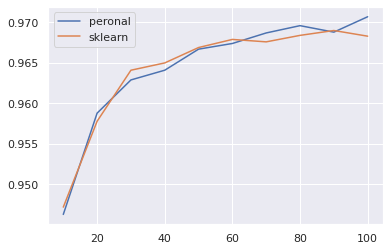

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

sns.lineplot(estimators,accuracies)
sns.lineplot(estimators,accuraciesV2)
plt.legend(["peronal","sklearn"])

- (6) Compute the feature importance for the 784 features of MNIST according to your random forest (to compute the feature importance of each tree, you can either use sklearn’s precomputed feature importance, tree.feature\_importances\_, or you can use your own implementation from Exercise 1.

In [9]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
def getFeatureImportance(fi_rf):
  num = np.array([tree.feature_importances_ for tree in fi_rf.estimators_])
  return num.sum(axis=0)/num.sum()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.14285)
# we need just the feature importance, so we can fit with all our data

fi_rf = RandomForestClassifier()
fi_rf.fit(X_train,y_train)
feature_importance = getFeatureImportance(fi_rf)

In [10]:
# Returns True if two arrays are element-wise equal within a tolerance
np.allclose(feature_importance, fi_rf.feature_importances_)

True

- (7*) From the previous exercise, you should now have an array with 784 feature importances, one for each of the features in MNIST. You can reshape this array to a 28  28 matrix of values (remember that MNIST images are 2828 black and white images). You can use the seaborn library to visualize a heatmap of this matrix (i.e. a 2D grid where elements have different colors based on their value). <br />
Now train a randomforest fromsklearn, extract its feature importance (rf.feature_importances_)
and visualize it. Does it resemble your results? What are the most important features? From Lab 1, you should have some idea as to which features are most relevant to distinguish 0’s from 1’s. Are those pixels also relevant for the 10 classes problem?

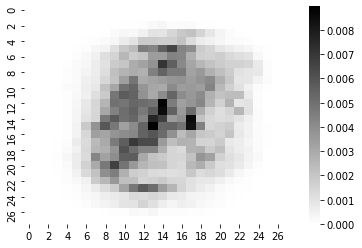

In [11]:
import seaborn as sns
from sklearn.metrics import accuracy_score

sns.heatmap(np.reshape(feature_importance, (28,28)), cmap='binary')

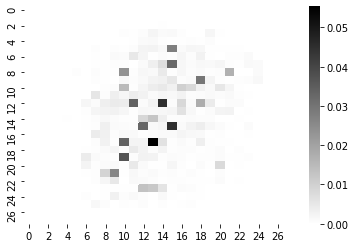

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

sns.heatmap(np.reshape(dt_clf.feature_importances_, (28,28)), cmap='binary')

The random forest classifier check on all the "center" points, without considering the external points (which are the less used among the various numbers), whereas a single decision tree is more focused on less points